In [24]:
import pandas as pd

df = pd.read_excel("cleaned_data.xlsx")

In [13]:
df

ADMIT_YEAR  MAJOR_ID            MAJOR_NAME_THAI  DEPT_ID  STUDY_STATUS  \
0          2559       215          วิศวกรรมเครื่องกล       30             1   
1          2559       230               วิศวกรรมเคมี       32             2   
2          2559       210              วิศวกรรมไฟฟ้า       28             2   
3          2559       200          ยังไม่แยกสาขาวิชา      193             1   
4          2559       240        วิศวกรรมคอมพิวเตอร์       34             1   
..          ...       ...                        ...      ...           ...   
343        2564       254  วิศวกรรมเหมืองแร่และวัสดุ       33             1   
344        2564       200          ยังไม่แยกสาขาวิชา      193             1   
345        2564       254  วิศวกรรมเหมืองแร่และวัสดุ       33             1   
346        2564       225          วิศวกรรมอุตสาหการ       31             1   
347        2564       200          ยังไม่แยกสาขาวิชา      193             1   

     STILL_STUDENT  SEX_SHORT_NAME_THAI ENT_METHOD  ENG_SCORE  \
0                1                    1         01      21.00   
1                3                    0         38      53.00   
2                3                    0         40      53.00   
3                1                    1         38      34.00   
4                1                    0         01      24.00   
..             ...                  ...        ...        ...   
343              1                    1         38      30.00   
344              1                    0         39      28.75   
345              1                    1         E1      23.75   
346              1                    0         E1      28.75   
347              1                    1         E1      28.75   

     IS_GRAD_IN_COURSE  ...  mean_y2_s2  mean_y2_s3  mean_y3_s1  mean_y3_s2  \
0                    2  ...    3.086000    3.110000    3.161429    2.766250   
1                    3  ...    2.293095    2.388119    2.374385    2.350009   
2                    4  ...    2.427274    2.505077    2.487416    2.454754   
3                    1  ...    2.186000    2.363333    2.430000    2.457500   
4                    1  ...    2.525568    2.552639    2.511950    2.498893   
..                 ...  ...         ...         ...         ...         ...   
343                  1  ...    3.324305    3.322048    3.320436    3.319227   
344                  1  ...    2.752457    2.734131    2.661139    2.603943   
345                  1  ...    3.376305    3.365381    3.357579    3.351727   
346                  1  ...    3.052601    3.012465    2.904979    2.812396   
347                  1  ...    2.664457    2.660797    2.598282    2.548943   

     mean_y3_s3  mean_y4_s1  mean_y4_s2  mean_y4_s3  FUND_NAME_CODE  \
0      2.826667    2.917000    2.843721    2.748854               2   
1      2.343831    2.371205    2.337431    2.331926               4   
2      2.445682    2.451580    2.421510    2.406194               5   
3      2.184444    2.238000    2.345455    2.312179               1   
4      2.487304    2.482480    2.427607    2.377541               1   
..          ...         ...         ...         ...             ...   
343    3.318286    3.317534    3.316918    3.316405               3   
344    2.537209    2.532579    2.507572    2.460787               3   
345    3.347175    3.343534    3.340555    3.338072               3   
346    2.774845    2.736981    2.673208    2.616498               3   
347    2.488320    2.488579    2.467572    2.424120               3   

     PARENTS_MARRIED_NAME_CODE  
0                            6  
1                           10  
2                            9  
3                           10  
4                            9  
..                         ...  
343                          9  
344                          9  
345                          2  
346                          2  
347                          9  

[348 rows x 37 columns]

In [25]:
import sklearn
from sklearn.model_selection import train_test_split


In [26]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [28]:
print("ข้อมูลทั้งหมดในการเทรน 70%:", len(train_df))
print("ข้อมูลทั้งหมดในการเทส 30%:", len(test_df))

ข้อมูลทั้งหมดในการเทรน 70%: 3068
ข้อมูลทั้งหมดในการเทส 30%: 767


In [27]:
from pycaret.classification import *
clf = setup(data=train_df, target="STUDY_STATUS")
best_model = compare_models()

In [18]:
dt = create_model("dt")

In [19]:
dt = tune_model(dt)

In [20]:
final_model = finalize_model(dt)

In [30]:
predict_newmodel_2 = predict_model(final_model , data = test_df)
predict_newmodel_2[["STUDY_STATUS",'Label',"Score"]]

ValueError: Number of features of the model must match the input. Model n_features is 90 and input n_features is 569 

In [ ]:
result_score = predict_newmodel_2['Score'].mean()
print(f'Score => {result_score}')

Score => 0.9774966116420504


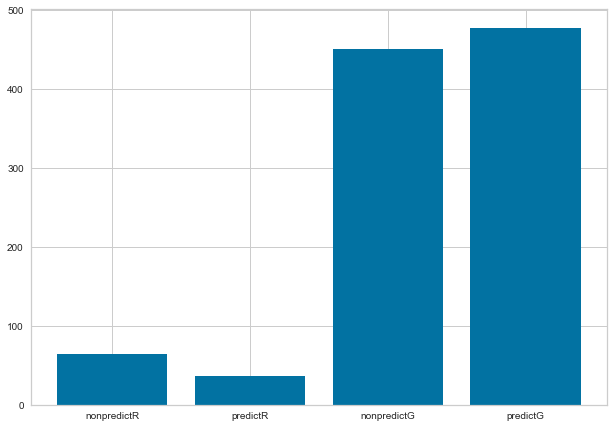

In [ ]:
predictR = len(predict_newmodel_2[predict_newmodel_2['Label'] == 'R'])
nonpredictR = len(predict_newmodel_2[predict_newmodel_2['STUDY_STATUS'] == 'R'])
predictG = len(predict_newmodel_2[predict_newmodel_2['Label'] == 'G'])
nonpredictG = len(predict_newmodel_2[predict_newmodel_2['STUDY_STATUS'] == 'G'])

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['nonpredictR', 'predictR','nonpredictG','predictG']
students = [nonpredictR,predictR,nonpredictG,predictG]
ax.bar(langs,students)
plt.show()



In [ ]:
print(f'Real Answer (R) = {nonpredictR}')
print(f'After Predict R = {predictR}')
print(' ')
print(f'Real Answer (G) = {nonpredictG}')
print(f'After Predict G = {predictG}')

Real Answer (R) = 64
After Predict R = 37
 
Real Answer (G) = 451
After Predict G = 478
